In [2]:
!pip install ultralytics==8.0.196

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import os
from IPython.display import display, Image

In [5]:
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Models( Production ) /best.pt')

In [8]:
import os
from PIL import Image as PILImage

image_folder = '/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Dataset'
for image_file in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_file)
    if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        im = PILImage.open(image_path)
        results = model.predict(source=im, save=True, show=False)  # save plotted images without showing


0: 480x640 1 License Plate, 327.6ms
Speed: 4.7ms preprocess, 327.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict

0: 640x512 1 License Plate, 276.5ms
Speed: 6.3ms preprocess, 276.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict

0: 640x512 1 License Plate, 278.5ms
Speed: 5.1ms preprocess, 278.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict

0: 640x512 1 License Plate, 308.7ms
Speed: 6.0ms preprocess, 308.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/predict

0: 640x480 1 License Plate, 271.4ms
Speed: 8.7ms preprocess, 271.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict

0: 480x640 1 License Plate, 289.0ms
Speed: 8.0ms preprocess, 289.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Resul

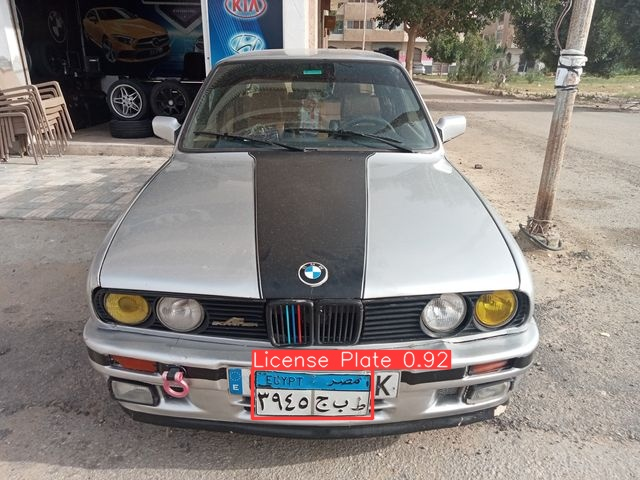

In [ ]:
display(Image(filename = 'runs/detect/predict/0002.jpg', height=600))


image 1/1 c:\Users\Hello\Desktop\Smart_Garage_System\0003.jpg: 640x480 1 License Plate, 147.9ms
Speed: 4.0ms preprocess, 147.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict


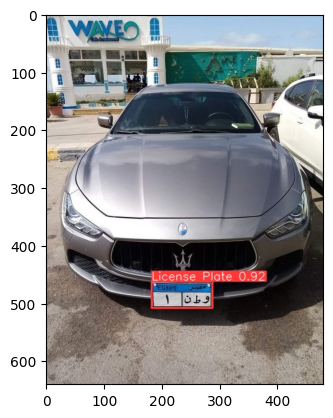

In [ ]:
# from PIL
#im2 = Image.open("/content/drive/MyDrive/Colab Notebooks/NTI/NTI Graduation Project/Testing images/1005.jpg")
results2 = model.predict(source='0003.jpg', save=True, show=False)  # save plotted images
# Display the image using matplotlib to avoid cv2.imshow() issues
from matplotlib import pyplot as plt
img = plt.imread('runs/detect/predict/0003.jpg')
plt.imshow(img)
plt.show()

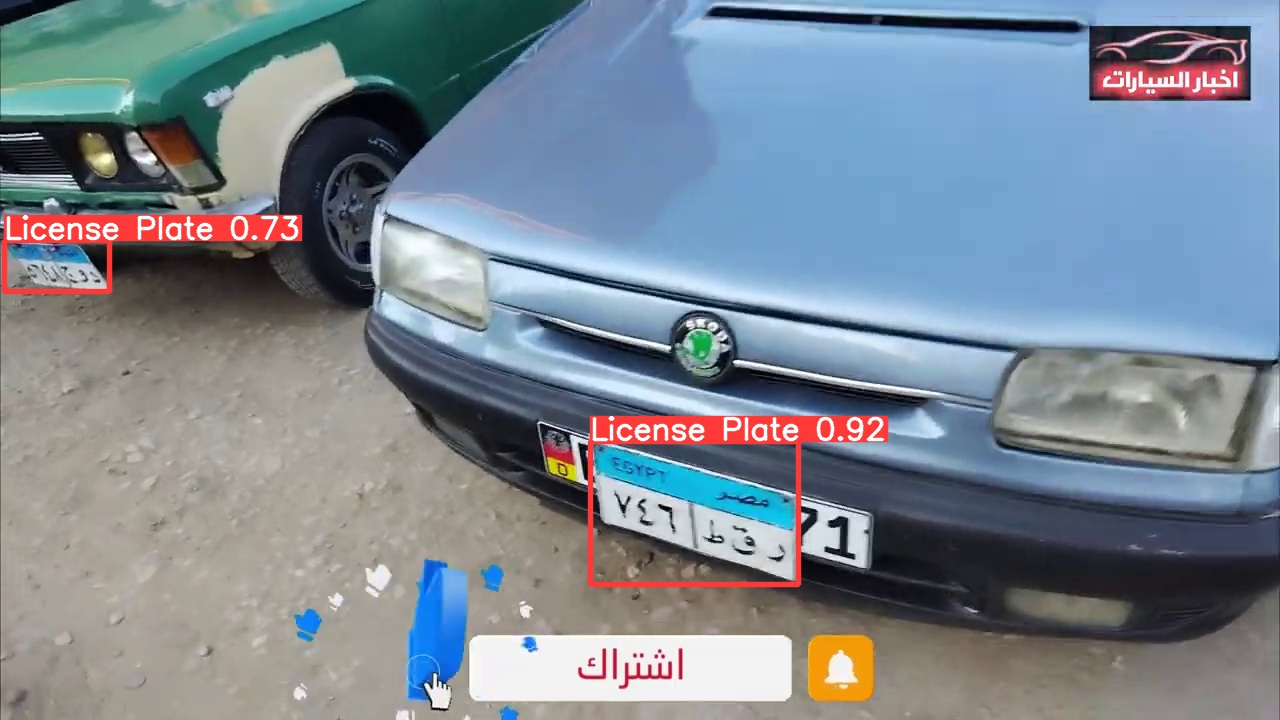

In [ ]:
display(Image(filename = '/content/runs/detect/predict2/1005.jpg'))

In [9]:
def detect_and_crop(image_path, model, output_dir="cropped_plates"):
    """
    Detects car plates in an image, crops them, and saves them to a specified directory with the original file name.

    Args:
        image_path: Path to the image file.
        model: YOLO model for object detection.
        output_dir: Directory to save cropped plates.

    Returns:
        List of paths to saved cropped plate images.
    """

    cropped_plate_paths = []

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Load image
    image = cv2.imread(image_path)

    # Detect car plates
    results = model(image)

    if len(results) == 0:
        print("No car plates detected.")
        return cropped_plate_paths

    # Extract bounding boxes
    for result in results:
        boxes = result.boxes.xyxy  # Get bounding box coordinates

        # Extract the original file name without extension
        original_filename = os.path.splitext(os.path.basename(image_path))[0]

        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box)
            cropped_plate = image[y1:y2, x1:x2]

            # Save cropped plate with original file name and index
            output_path = os.path.join(output_dir, f"{original_filename}_plate.jpg")
            cv2.imwrite(output_path, cropped_plate)
            cropped_plate_paths.append(output_path)

    return cropped_plate_paths

In [10]:
import os

image_folder = '/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Dataset'
for image_file in os.listdir(image_folder):
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        detect_and_crop(os.path.join(image_folder, image_file), model)


0: 480x640 1 License Plate, 207.4ms
Speed: 6.3ms preprocess, 207.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 640x512 1 License Plate, 175.8ms
Speed: 5.6ms preprocess, 175.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 License Plate, 190.4ms
Speed: 6.1ms preprocess, 190.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 1 License Plate, 207.0ms
Speed: 7.3ms preprocess, 207.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)

0: 640x480 1 License Plate, 177.1ms
Speed: 7.5ms preprocess, 177.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

0: 480x640 1 License Plate, 196.8ms
Speed: 4.9ms preprocess, 196.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 640x512 1 License Plate, 194.1ms
Speed: 5.9ms preprocess, 194.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)

0: 448x640 1 License Plate, 189.1ms
Speed: 4.6ms prepr

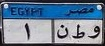

In [ ]:
display(Image(filename = 'cropped_plates/plate_0.jpg',  height = 300))  # Ready to enter an OCR model

In [ ]:
display(Image(filename = '/content/cropped_plates/plate_1.jpg',  height = 300))  # Ready to enter an OCR model

In [ ]:
#### Trying another image

detect_and_crop('0118.jpg', model)


0: 640x640 1 License Plate, 214.0ms
Speed: 10.0ms preprocess, 214.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


['cropped_plates\\plate_0.jpg']

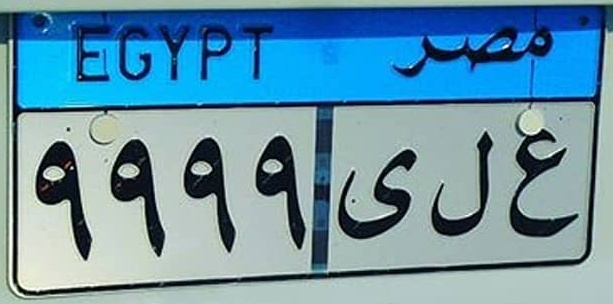

In [ ]:
display(Image(filename = 'cropped_plates/plate_0.jpg',  height = 300))  # Ready to enter an OCR model

In [ ]:
results5 = model(source = '/content/drive/MyDrive/Colab Notebooks/NTI/NTI Graduation Project/Testing images/7.mp4', save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/119) /content/drive/MyDrive/Colab Notebooks/NTI/NTI Graduation Project/Testing images/7.mp4: 384x640 1 License Plate, 199.6ms
video 1/1 (2/119) /content/drive/MyDrive/Colab Notebooks/NTI/NTI Graduation Project/Testing images/7.mp4: 384x640 1 License Plate, 151.0ms
video 1/1 (3/119) /content/drive/MyDrive/Colab Notebooks/NTI/NTI Graduation Project/Testing images/7.mp4: 384x640 1 License Plate, 126.1ms
video 1/1 (4/119) /content/drive/MyDriv

In [11]:
import shutil
# Replace 'your_drive_folder' with the actual path to your desired folder in Google Drive
shutil.copytree('/content/runs', '/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Models( Production ) /runs')
shutil.copytree('/content/cropped_plates', '/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Models( Production ) /cropped_plates')

'/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Models( Production ) /cropped_plates'